In [32]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# In[46]:


#dataset and information regarding each notation
#This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

#id :a notation for a house

#date: Date house was sold

#price: Price is prediction target

#bedrooms: Number of Bedrooms/House

#bathrooms: Number of bathrooms/bedrooms

#sqft_living: square footage of the home

#sqft_lot: square footage of the lot

#floors :Total floors (levels) in house

#waterfront :House which has a view to a waterfront

#view: Has been viewed

#condition :How good the condition is Overall

#grade: overall grade given to the housing unit, based on King County grading system

#sqft_above :square footage of house apart from basement

#sqft_basement: square footage of the basement

#yr_built :Built Year

#yr_renovated :Year when house was renovated

#zipcode:zip code

#lat: Latitude coordinate

#long: Longitude coordinate

#sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

#sqft_lot15 :lotSize area in 2015(implies-- some renovations)

In [3]:
## Use Pandas read function
## Remember to change filepath to your machine
house_df = pd.read_csv('E:\\ADS 500_B\\house_sales.csv')

# Making sure the file was read properly

In [4]:
house_df.head()
# Returns the first n rows for the object based on the position


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0       3.0       1.00       1180.0   
1  6414100192  20141209T000000  538000.0       3.0       2.25       2570.0   
2  5631500400  20150225T000000  180000.0       2.0       1.00        770.0   
3  2487200875  20141209T000000  604000.0       4.0       3.00       1960.0   
4  1954400510  20150218T000000  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
house_df.shape
#Checks the dimensions of the house_df data frame


(21613, 21)

In [6]:
#Swaps the format of the date to a a
house_df['date'] = pd.to_datetime(house_df['date'])

In [7]:
# Returns the first 5 rows for the object based on the position
house_df.head()


id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0    5650.0     1.0           0     0  ...      7        1180              0   
1    7242.0     2.0           0     0  ...      7        2170            400   
2   10000.0     1.0           0     0  ...      6         770              0   
3    5000.0     1.0           0     0  ...      7        1050            910   
4    8080.0     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [8]:
house_median = house_df.median()
house_median.head

<ipython-input-8-c8217d5b81dc>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  house_median = house_df.median()


<bound method NDFrame.head of id               3.904930e+09
price            4.500000e+05
bedrooms         3.000000e+00
bathrooms        2.250000e+00
sqft_living      1.920000e+03
sqft_lot         7.620000e+03
floors           1.500000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       1.560000e+03
sqft_basement    0.000000e+00
yr_built         1.975000e+03
yr_renovated     0.000000e+00
zipcode          9.806500e+04
lat              4.757180e+01
long            -1.222300e+02
sqft_living15    1.840000e+03
sqft_lot15       7.620000e+03
dtype: float64>

In [9]:
house_df = house_df.fillna(value = house_median)

#checking results
house_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
#physically changing the data types

house_df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [11]:
#change data types 

house_df = house_df.astype({"id": str, "lat": str, "floors": 'category',"waterfront": 'category',"view": 'category',"condition": 'category', "grade": 'category', 'zipcode' : str, 'long' : str })
#df = df.astype({"a": int, "b": complex})

In [12]:
house_df.dtypes

id                       object
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                 category
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                      object
long                     object
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
house_df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0       3.0       1.00       1180.0   
1  6414100192 2014-12-09  538000.0       3.0       2.25       2570.0   
2  5631500400 2015-02-25  180000.0       2.0       1.00        770.0   
3  2487200875 2014-12-09  604000.0       4.0       3.00       1960.0   
4  1954400510 2015-02-18  510000.0       3.0       2.00       1680.0   

   sqft_lot floors waterfront view  ... grade sqft_above  sqft_basement  \
0    5650.0    1.0          0    0  ...     7       1180              0   
1    7242.0    2.0          0    0  ...     7       2170            400   
2   10000.0    1.0          0    0  ...     6        770              0   
3    5000.0    1.0          0    0  ...     7       1050            910   
4    8080.0    1.0          0    0  ...     8       1680              0   

   yr_built  yr_renovated  zipcode      lat      long sqft_living15  \
0      1955             0    98178  47.5112  -122.257          1340   
1      1951          1991    98125   47.721  -122.319          1690   
2      1933             0    98028  47.7379  -122.233          2720   
3      1965             0    98136  47.5208  -122.393          1360   
4      1987             0    98074  47.6168  -122.045          1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

<AxesSubplot:>

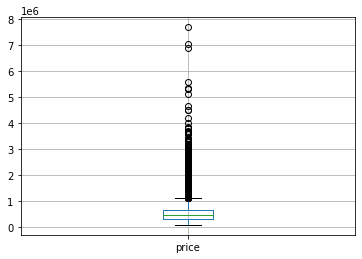

In [14]:
house_df.boxplot(column = ['price'])

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

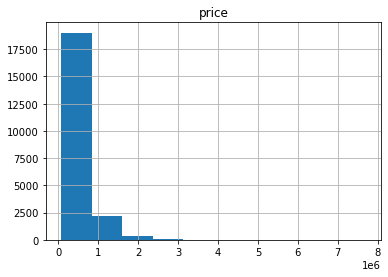

In [15]:
house_df.hist(column = ['price'])

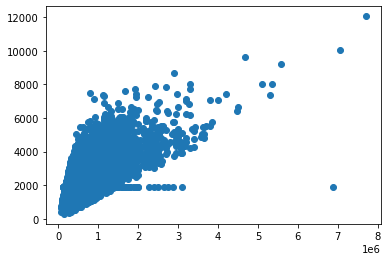

In [16]:
plt.scatter(house_df['price'],house_df['sqft_living'])

In [17]:
corr_coef = np.corrcoef(house_df['price'],house_df['sqft_living'])
corr_coef

array([[1.        , 0.68152667],
       [0.68152667, 1.        ]])

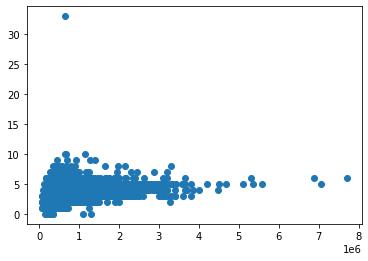

In [18]:
plt.scatter(house_df['price'],house_df['bedrooms'])

In [19]:
houseprice_mean = house_df.groupby('zipcode')['price'].mean()

In [20]:
houseprice_mean.head()

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
Name: price, dtype: float64

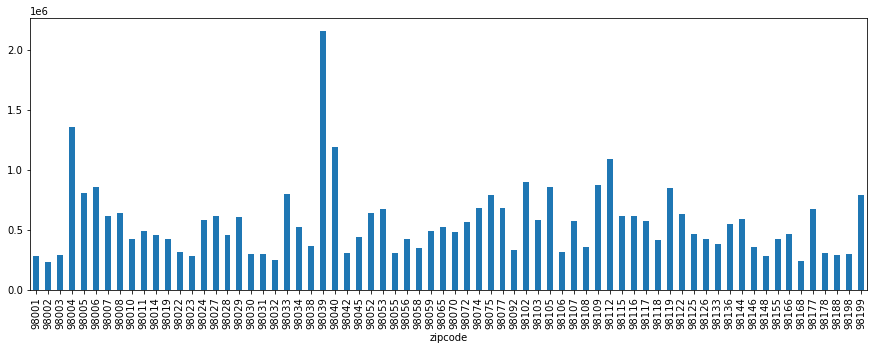

In [21]:
my_plot = houseprice_mean.plot(kind = 'bar',figsize =(15,5))

#plots a bar graph based on zipcode 

In [22]:
print(house_df.corr())

                  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price          1.000000  0.302493   0.515365     0.681527  0.086530   
bedrooms       0.302493  1.000000   0.487280     0.549054  0.027174   
bathrooms      0.515365  0.487280   1.000000     0.714307  0.083146   
sqft_living    0.681527  0.549054   0.714307     1.000000  0.159695   
sqft_lot       0.086530  0.027174   0.083146     0.159695  1.000000   
sqft_above     0.605567  0.465769   0.667757     0.850785  0.176831   
sqft_basement  0.323816  0.291689   0.276989     0.420720  0.015346   
yr_built       0.054012  0.150364   0.495315     0.310977  0.050494   
yr_renovated   0.126434  0.019269   0.048536     0.055857  0.008588   
sqft_living15  0.585379  0.381110   0.554516     0.736945  0.142063   
sqft_lot15     0.082447  0.024089   0.086509     0.175089  0.717635   

               sqft_above  sqft_basement  yr_built  yr_renovated  \
price            0.605567       0.323816  0.054012      0.126434   
bedrooms   

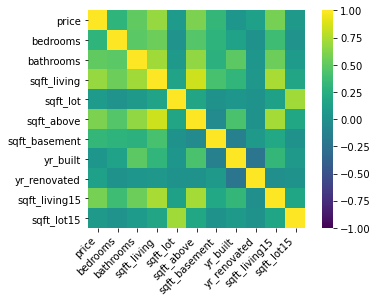

In [23]:
#Uses a seaborn heat map based ont the correlation of the house dataframe


corr = house_df.corr()

ax = sns.heatmap(
    corr, 
    vmin = -1, vmax=1, center=0,
    cmap = sns.color_palette("viridis", as_cmap = True),
    square = True
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45 ,horizontalalignment='right'
);

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\s

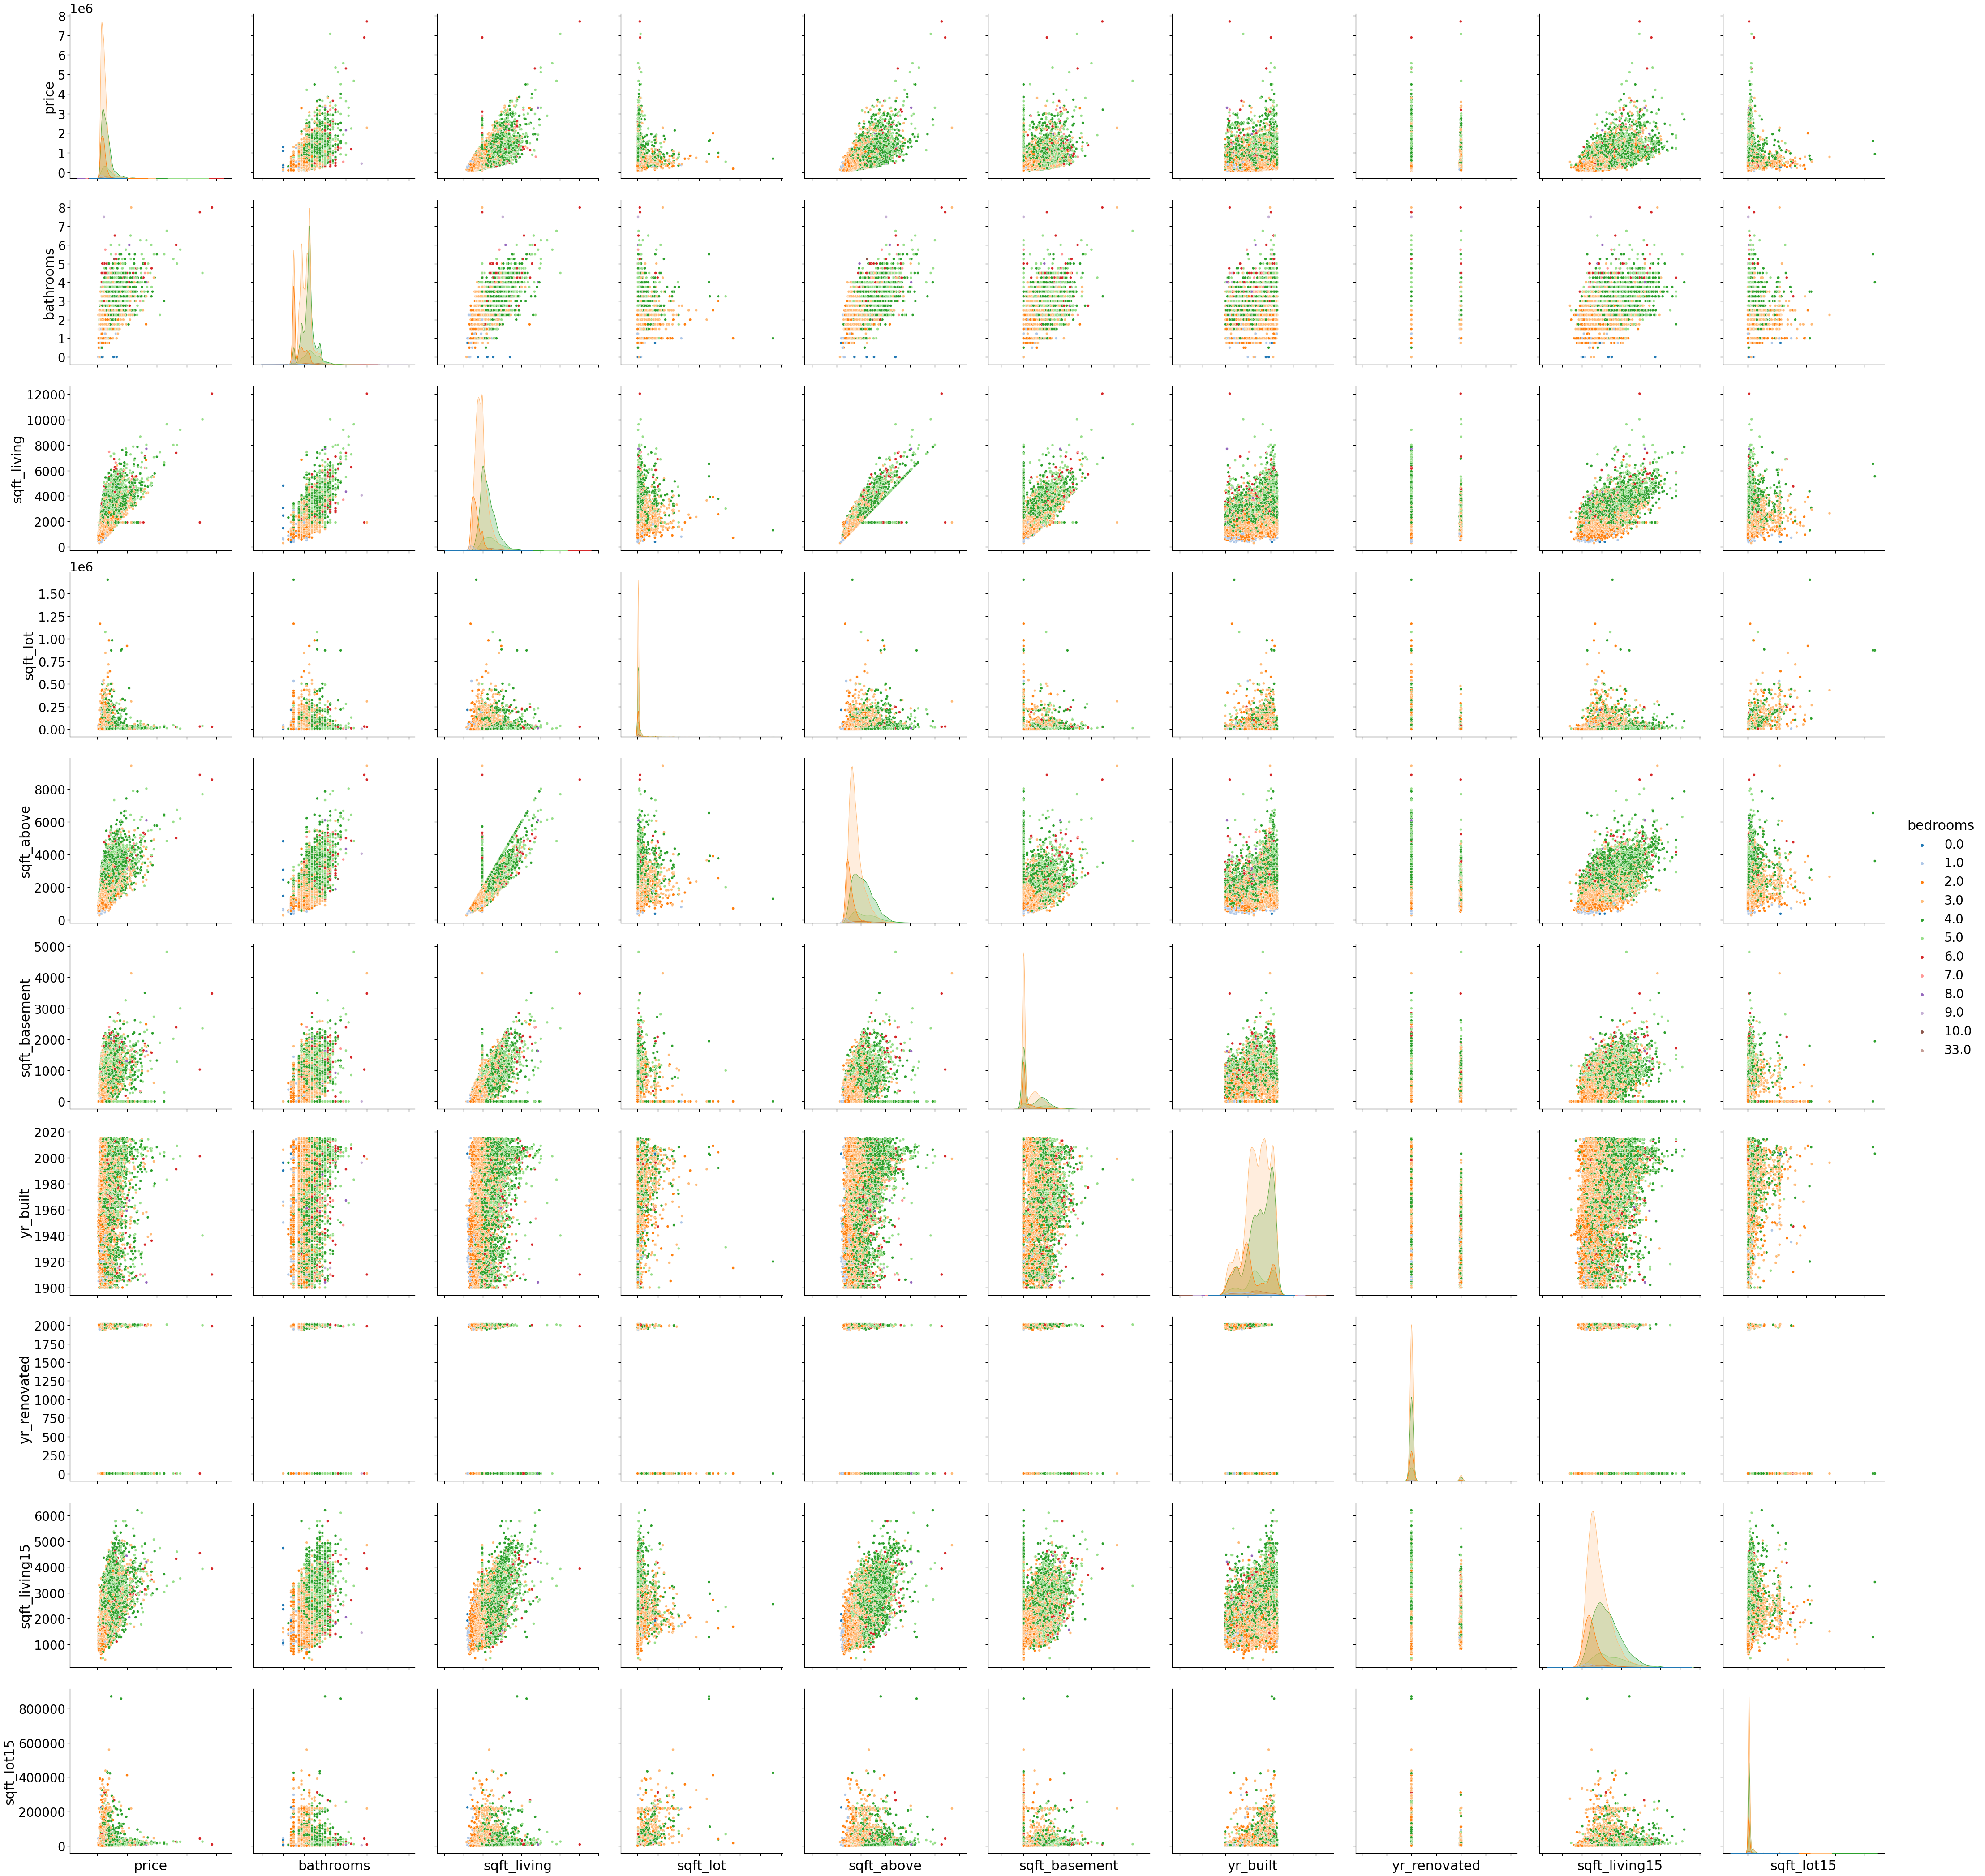

In [24]:
with sns.plotting_context("notebook", font_scale = 2.5):
    g = sns.pairplot(house_df, hue = 'bedrooms', palette = 'tab20', size = 6)
    g.set(xticklabels = []);

E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\s

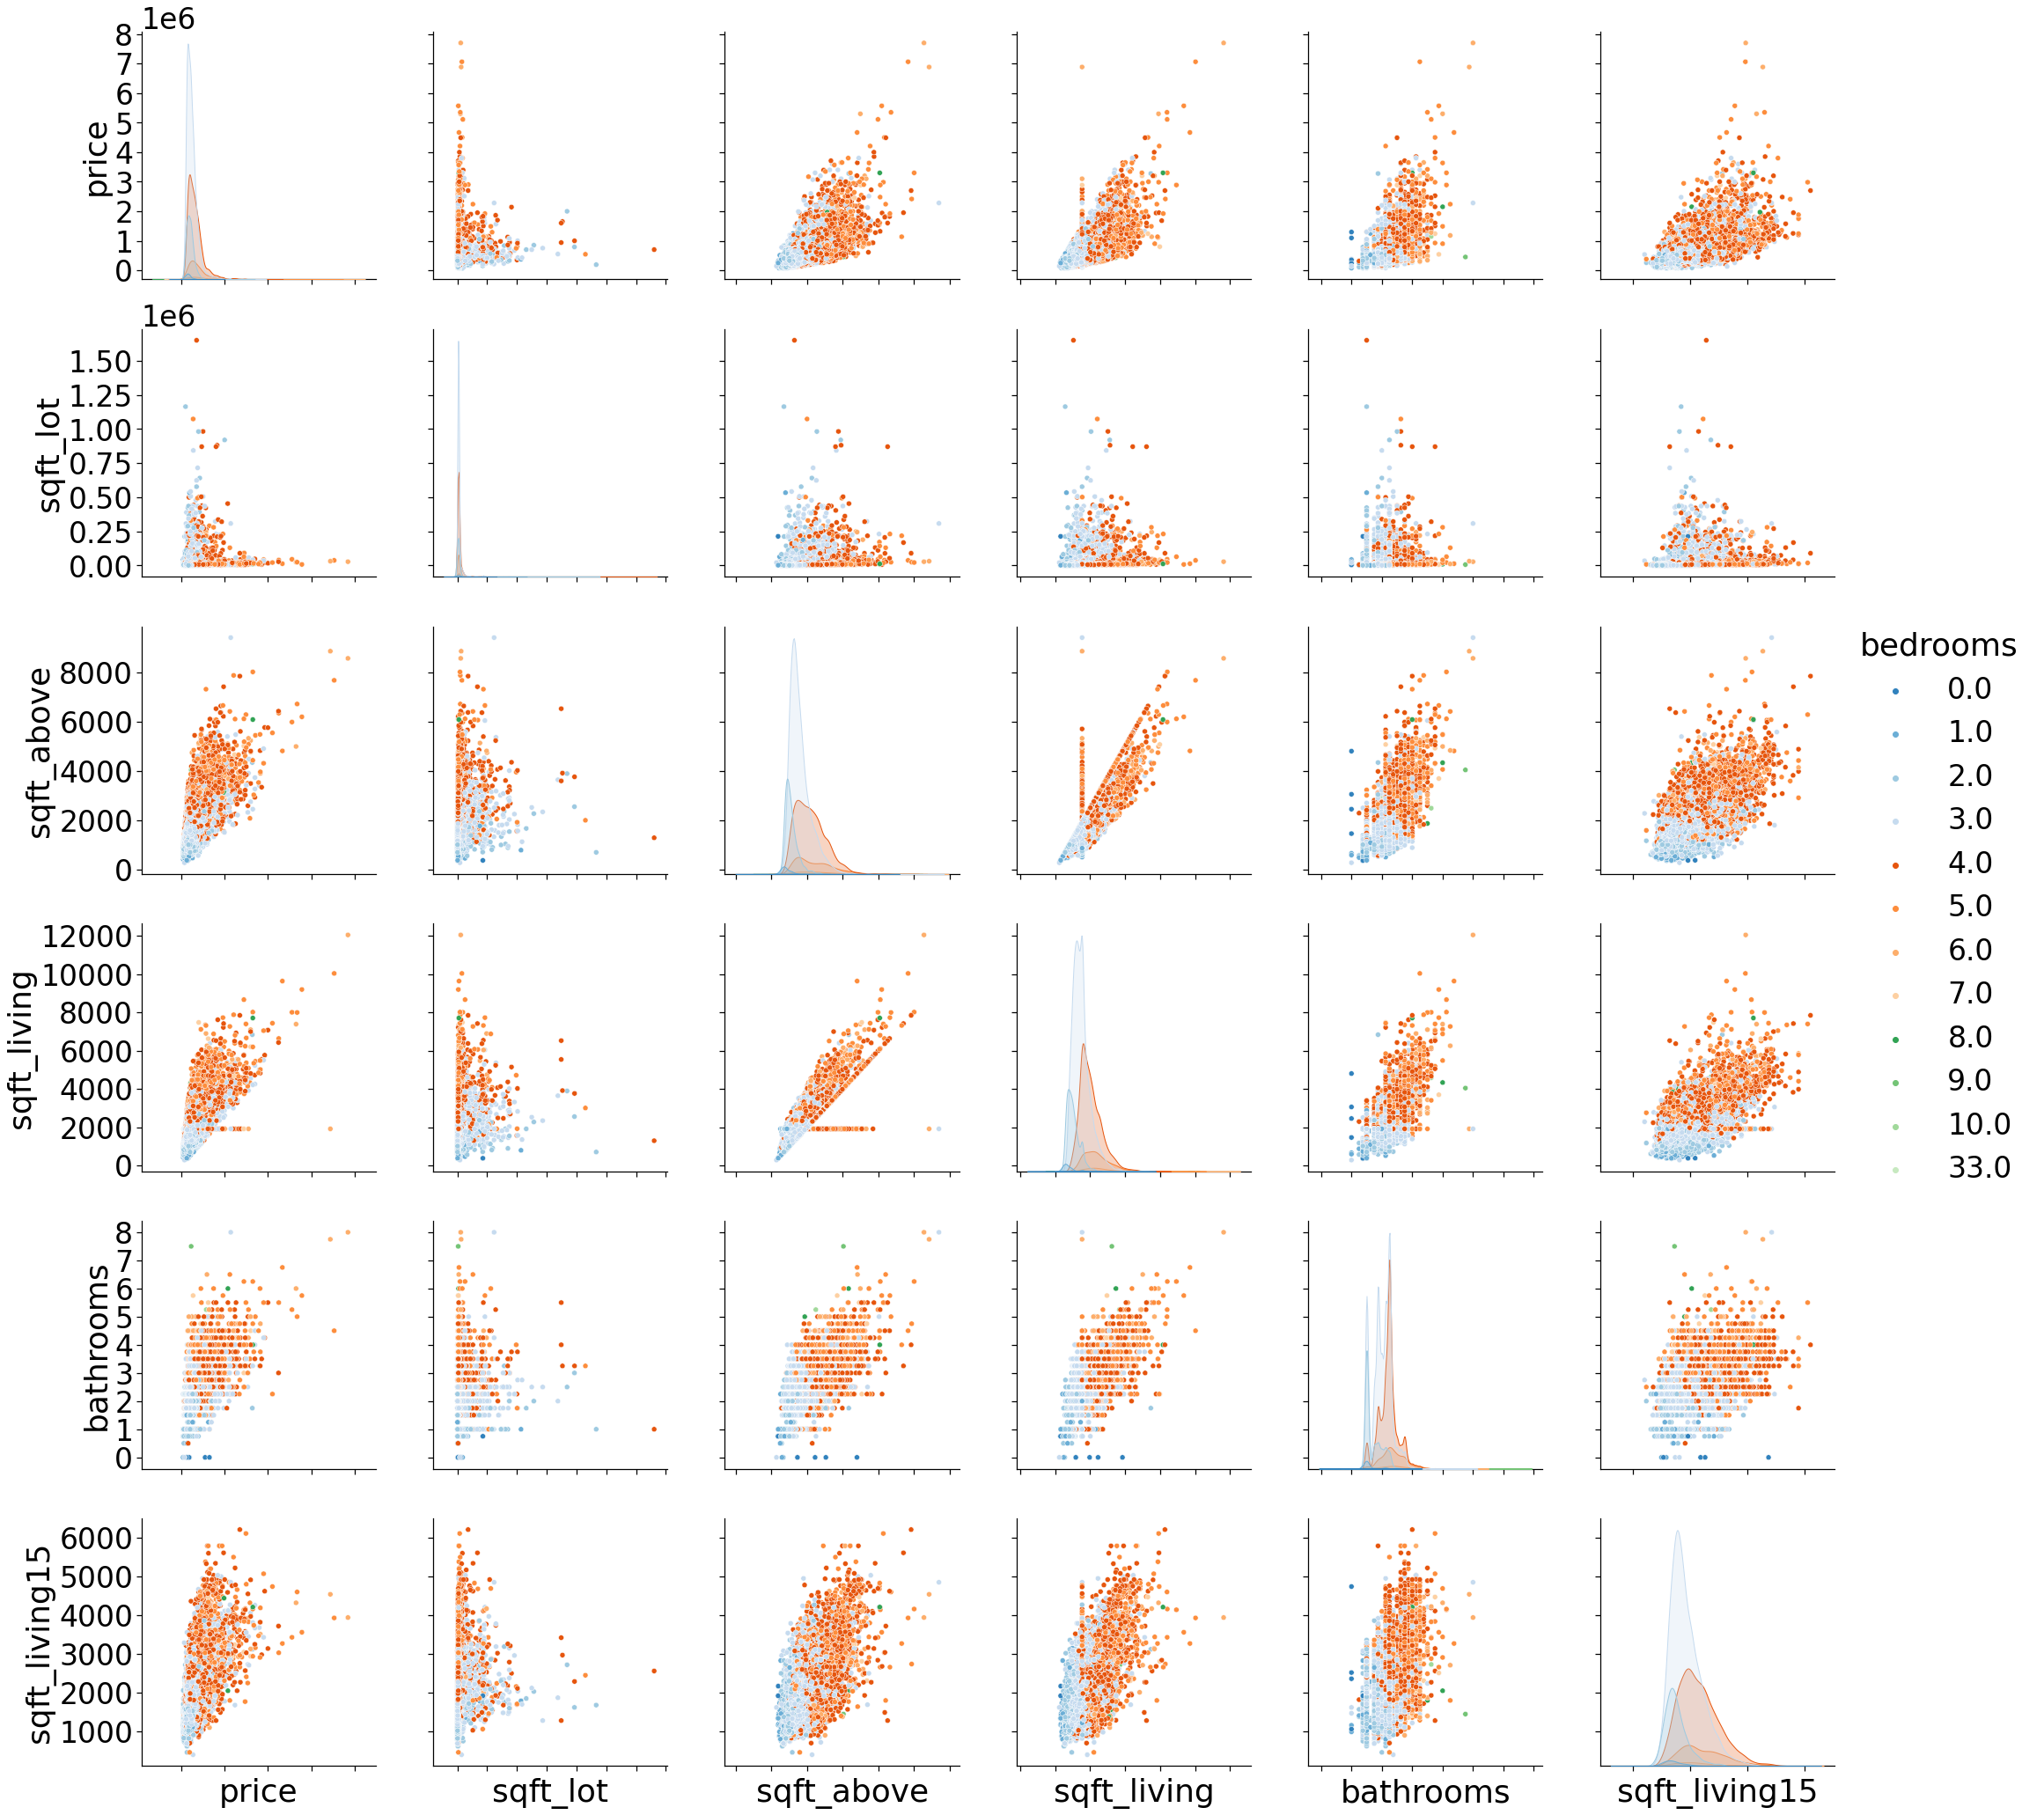

In [25]:

#Excludes data that do not have much correlation, saves both computing power and prevents overfitting when making a mulitple regression value.

with sns.plotting_context("notebook", font_scale = 3):
    g = sns.pairplot(house_df[['price', 'sqft_lot', 'sqft_above', 'sqft_living', 'bedrooms', 'bathrooms', 'sqft_living15']], hue = 'bedrooms', palette = 'tab20c', size = 5)
    g.set(xticklabels = []);

In [26]:
#Defining data to work with. The inputs (regressors, x) and output (predictor,y) should be arrays

house_df.drop(['id', 'date', 'lat', 'zipcode', 'long', 'yr_renovated', 'yr_built','waterfront','view'], axis = 1, inplace = True)

In [27]:
house_df.columns

house_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot floors condition  \
0  221900.0       3.0       1.00       1180.0    5650.0    1.0         3   
1  538000.0       3.0       2.25       2570.0    7242.0    2.0         3   
2  180000.0       2.0       1.00        770.0   10000.0    1.0         3   
3  604000.0       4.0       3.00       1960.0    5000.0    1.0         5   
4  510000.0       3.0       2.00       1680.0    8080.0    1.0         3   

  grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  
0     7        1180              0           1340        5650  
1     7        2170            400           1690        7639  
2     6         770              0           2720        8062  
3     7        1050            910           1360        5000  
4     8        1680              0           1800        7503

In [28]:
#check for VIF(Variance inflation factor) to detect multicollinearity in regression analysis. Check between highest correlation with price and sqft living, then check VIF for sqft_living and sqft_above.

X = house_df

#VIF dataframe
#https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

vif_data = pd.DataFrame()
vif_data["feeature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                    for i in range(len(X.columns))]
print(vif_data)


#The higher the VIF value, would indicate a higher correlation. 
#As sqft_living and sqft_above are pretty much similar since they 
#take the same mount of square footage. only difference is that the 
#sqft_above takes into account the footageof the basement. Research papers
#consider a VIF >10 as an indicator of multicollinearity

         feeature         VIF
0           price    6.702642
1        bedrooms   21.219467
2       bathrooms   23.894998
3     sqft_living  107.894099
4        sqft_lot    2.352061
5          floors   15.721846
6       condition   21.014851
7           grade   70.020019
8      sqft_above   95.520656
9   sqft_basement    7.861112
10  sqft_living15   25.943782
11     sqft_lot15    2.578328


E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


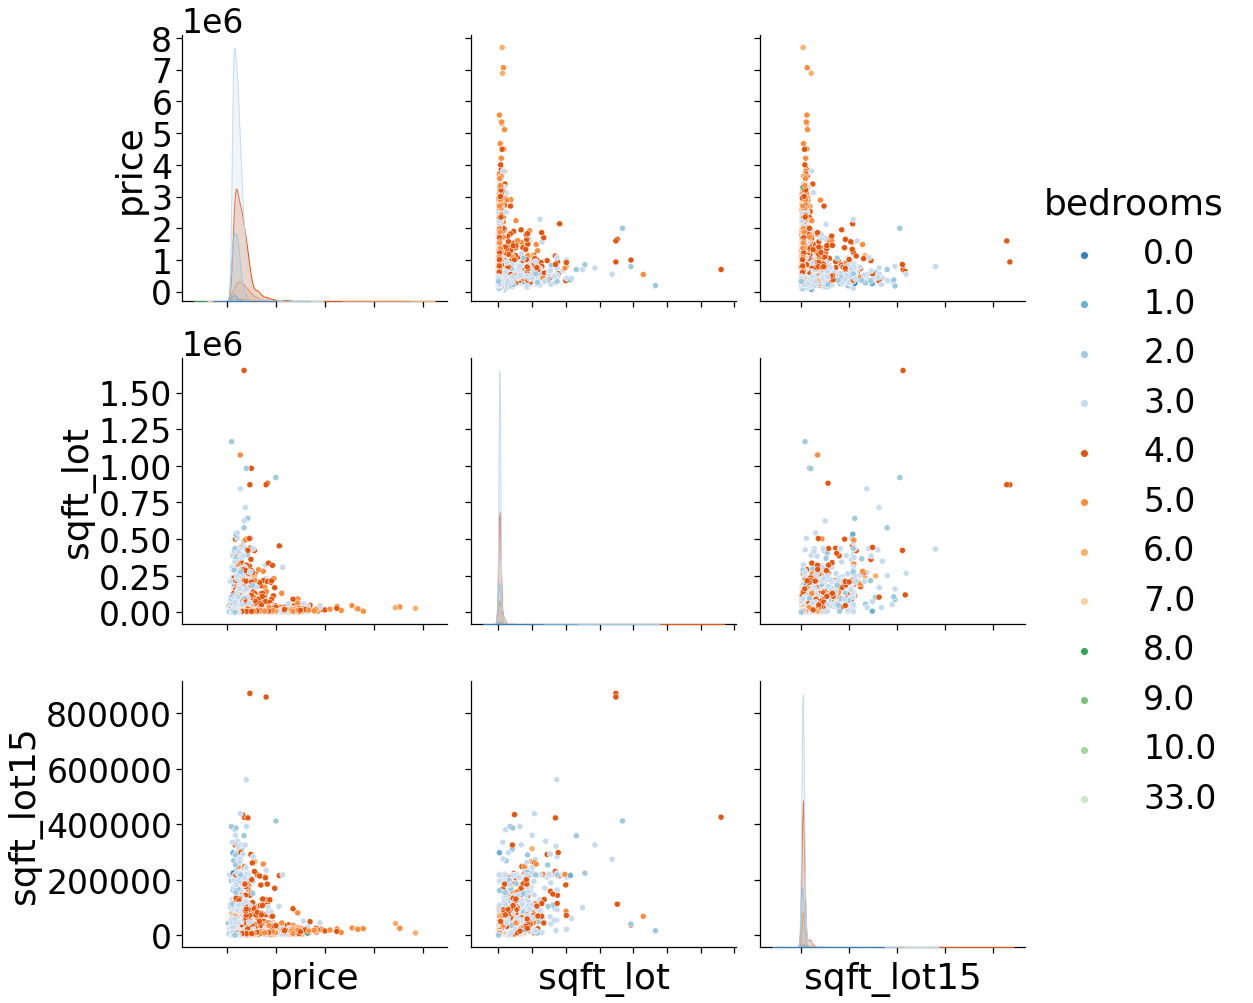

In [60]:
with sns.plotting_context("notebook", font_scale = 3):
    g = sns.pairplot(house_df[['price', 'sqft_lot', 'bedrooms', 'sqft_lot15']], hue = 'bedrooms', palette = 'tab20c', size = 5)
    g.set(xticklabels = []);

In [45]:
# Preparing X and Y plots for the regression model between price and sqft_lot



# create linear regression object
regr = LinearRegression()


#fit linear regression
regr.fit(house_df[['sqft_lot', 'sqft_lot15', 'sqft_basement']], house_df[['price']])


#prints intercept of the best fit line
print(regr.intercept_)


#prints the slope of the best fit line against 'sqft_lot', 'sqft_lot15', 'sqft_basement' against price
print(regr.coef_)







[448343.08519378]
[[  0.49361073   0.50821224 267.37867194]]


In [55]:
#imports statsmodels api to find relational R-squared values
#Uses the least Squares method and OLS model.
import statsmodels.api as sm

#Compiles a list of house_df to find the related coefficients between price and the other columns.
#sm.add_constant includes the interecept value to help center the value.
x = house_df[['sqft_lot', 'sqft_lot15', 'sqft_basement']]
y = house_df[['price']]
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     910.3
Date:                Wed, 04 Aug 2021   Prob (F-statistic):               0.00
Time:                        01:49:25   Log-Likelihood:            -3.0632e+05
No. Observations:               21613   AIC:                         6.126e+05
Df Residuals:                   21609   BIC:                         6.127e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.483e+05   3016.919    148.610      0.000    4.42e+05    4.54e+05
sqft_lot          0.4936      0.083      5.917      0.000       0.330       0.657
sqft_lot15        0.5082      0.124      4.106      0.000       0.266       0.751
sqft_basement   267.3787      5.318     50.279      0.000     256.955     277.802
==============================================================================
Omnibus:                    17985.176   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           904412.406
Skew:                           3.698   Prob(JB):                         0.00
Kurtosis:                      33.816   Cond. No.                     6.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""